# Importation Bibliothèques

In [1]:
import gymnasium as gym
import bbrl_gymnasium
from moviepy.editor import ipython_display as video_display
from RewardWrapper import RewardWrapper
from PrioritizedReplayAgent import PrioritizedReplayAgent
import matplotlib.pyplot as plt

from LargestFirst import LargestFirst
from RandomDyna import RandomDyna
from DjikstraFD import DjikstraFD
from SuccessorRepresentationFD import SuccessorRepresentationFD

from maze import setup_env_9x6, setup_env_18x12

import pandas as pd
import numpy as np

from omegaconf import OmegaConf
# Load YAML config file as DictConfig
config = OmegaConf.load("config.yaml")

Matplotlib backend: module://matplotlib_inline.backend_inline


# Paramètres

In [2]:
epsilon = config.main.epsilon  # parametres pour gerer l'exploration dans epsilongreedy
delta = config.main.delta  #treshold
gamma = config.main.gamma  #discount factor
alpha = config.main.alpha   #learning rate
max_step = config.main.max_step #nombre de pas maximum pour un episode

# Définition des labyrinthes

In [3]:
# environnement 9x6 
env_9x6 = gym.make("MazeMDP-v0", kwargs={"width": 9, "height": 6,
"start_states": [2], "walls": [13, 14, 15, 34, 42, 43, 44],
"terminal_states": [41]}, render_mode="rgb_array", gamma=gamma)

env_9x6.metadata['render_fps'] = 1
env_9x6 = RewardWrapper(env_9x6)
env_9x6.reset()
env_9x6.set_no_agent()
env_9x6.init_draw("The maze 9x6")

# environnement 18x12
env_18x12 = gym.make("MazeMDP-v0", kwargs={"width": 18, "height": 12,
"start_states": [4], "walls": [50,51,52,53,54,62,63,64,65,66, 128,129,140,141,168,169,170,171,172,173,180,181,182,183,184,185],
"terminal_states": [166,167,178,179]}, render_mode="rgb_array", gamma=gamma)

env_18x12.metadata['render_fps'] = 1
env_18x12 = RewardWrapper(env_18x12)
env_18x12.reset()

env_18x12.set_no_agent()
env_18x12.init_draw("The maze 18x12")




Output()

Output()

# Largest First Dyna

### Queue Dyna Priority Based on Prediction Difference Magnitude

In [5]:
from maze import setup_env_18x12
QueueDyna = LargestFirst(setup_env_18x12(), alpha, delta, epsilon,max_step, render = True, episode= 100)
QueueDyna.execute()


AttributeError: 'NoneType' object has no attribute 'VideoWriter_fourcc'

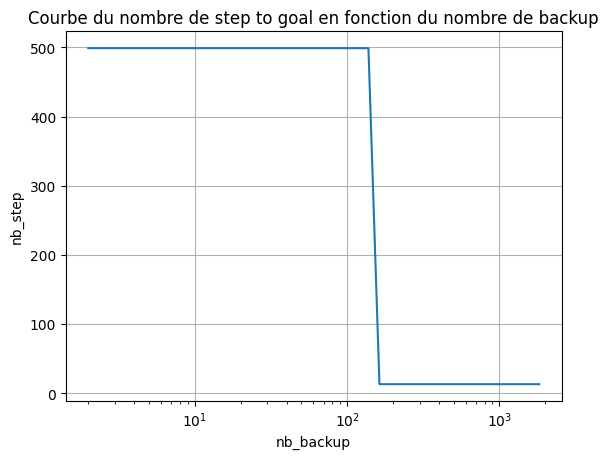

In [8]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)


plt.title('Courbe du nombre de step to goal en fonction du nombre de backup')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

# Random Dyna

In [10]:
from maze import setup_env_9x6

RDyna = RandomDyna(setup_env_9x6(), alpha, delta, epsilon, max_step, render = False, episode= 100)
RDyna.execute()

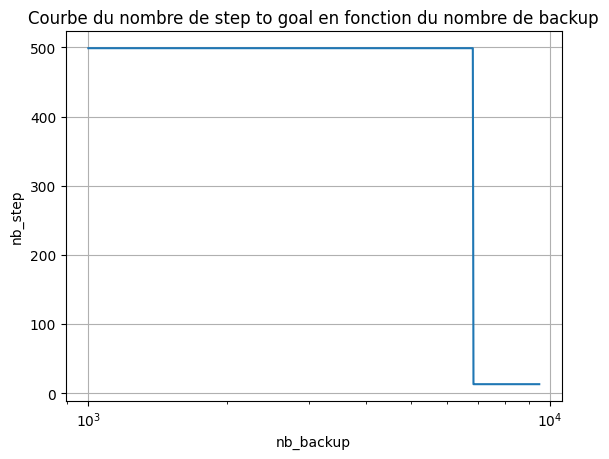

In [11]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)

plt.title('Courbe du nombre de step to goal en fonction du nombre de backup')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()


# Focused Dyna

In [3]:
FDyna = DjikstraFD(setup_env_9x6(), alpha, delta, epsilon,max_step, render = False, episode= 100)
FDyna.execute()


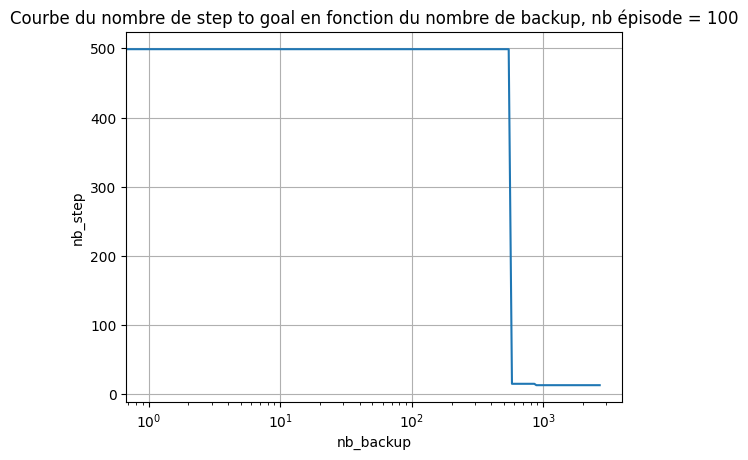

In [4]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)


plt.title(f'Courbe du nombre de step to goal en fonction du nombre de backup, nb épisode = {FDyna.episode}')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

# Test SR

## Small labyrinth

In [5]:
fdsr = SuccessorRepresentationFD(setup_env_9x6(), alpha,delta, epsilon, 100,500, 200, 20)

In [6]:
fdsr.execute()

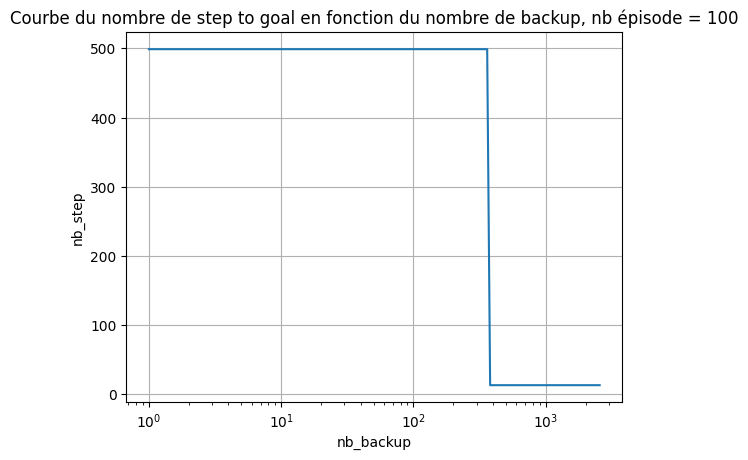

In [7]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)


plt.title(f'Courbe du nombre de step to goal en fonction du nombre de backup, nb épisode = {fdsr.episode}')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

In [10]:
fdsr.stepsFromStart

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 1,
 7: 2,
 8: 3,
 9: 4,
 10: 5,
 11: 6,
 12: 2,
 13: 6,
 14: 7,
 15: 3,
 16: 4,
 17: 5,
 18: 6,
 19: 7,
 20: 8,
 21: 4,
 22: 5,
 23: 6,
 24: 7,
 25: 8,
 26: 9,
 27: 5,
 28: 6,
 29: 7,
 30: 8,
 31: 10,
 32: 6,
 33: 7,
 34: 8,
 35: 10,
 36: 10,
 37: 11,
 38: 10,
 39: 11,
 40: 12,
 41: 19,
 42: 18,
 43: 12,
 44: 13,
 45: 15,
 46: 15}

In [11]:
fdsr.execute()

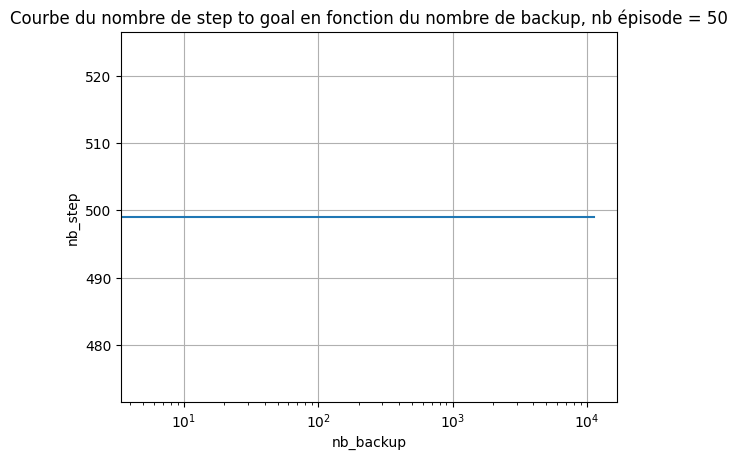

In [12]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)


plt.title(f'Courbe du nombre de step to goal en fonction du nombre de backup, nb épisode = {fdsr.episode}')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

# Figure 8

In [16]:
def moyenne_par_indice(liste):
    tableau = np.array(liste)
    moyennes = np.mean(tableau, axis=0)
    moyennes = np.where(np.isnan(moyennes), None, moyennes)
    return moyennes.tolist()

In [17]:
from scipy.interpolate import interp1d

all_steps_lg = []
all_backups_lg = []

all_steps_rd = []
all_backups_rd = []

all_steps_fc = []
all_backups_fc = []

all_steps_sr = []
all_backups_sr = []

nb_exec = 2
for i in range(nb_exec):
    QueueDyna = LargestFirst(env_18x12, alpha, delta, epsilon,max_step, render = False, episode= 500)
    QueueDyna.execute()
    print(i)
    data = pd.read_csv("executionInformation.csv")

    nb_steps = data.iloc[:, 1].tolist()
    nb_backup = data.iloc[:,0].tolist()
    all_steps_lg.append(nb_steps[:-2])
    all_backups_lg.append(nb_backup[:-2])

    RDyna = RandomDyna(env_18x12, alpha, delta, epsilon,max_step, render = False, episode= 500)
    RDyna.execute()
    print(i)
    data = pd.read_csv("executionInformation.csv")
    nb_steps =data.iloc[:, 1].tolist()
    nb_backup =data.iloc[:,0].tolist()
    all_steps_rd.append(nb_steps)
    all_backups_rd.append(nb_backup)

    FDyna = FocusedDyna(env_18x12, alpha, delta, epsilon,max_step, render = False, episode= 500)
    FDyna.execute()
    data = pd.read_csv("executionInformation.csv")
    print(i)
    nb_steps = data.iloc[:, 1].tolist()
    nb_backup = data.iloc[:,0].tolist()
    all_steps_fc.append(nb_steps)
    all_backups_fc.append(nb_backup)


    
    fdsr.execute()
    data = pd.read_csv("executionInformation.csv")
    print(i)
    nb_steps = data.iloc[:, 1].tolist()
    nb_backup = data.iloc[:,0].tolist()
    all_steps_sr.append(nb_steps)
    all_backups_sr.append(nb_backup)

    




0
0
0
0
0
12
24
36
37
38
38
39
40
40
40
39
38
39
40
28
40
41
41
42
43
44
51
50
51
50
43
50
51
58
51
58
59
71
83
95
94
95
94
95
107
108
96
97
109
109
109
97
96
97
109
109
119
129
141
129
119
109
97
109
97
85
97
109
119
129
119
129
141
153
159
158
159
165
164
176
177
189
0
1
1
2
3
2
2
3
4
4
16
28
29
41
42
30
18
19
7
6
18
30
18
30
42
43
50
57
58
59
60
61
60
72
71
83
84
85
97
85
97
109
119
129
141
153
159
158
164
165
177
189
0
12
24
12
13
14
2
3
2
2
3
4
5
6
18
30
42
41
40
41
42
30
29
17
18
6
18
17
18
30
42
41
42
43
50
57
58
57
58
59
52
53
52
59
60
59
60
72
73
72
71
83
84
83
71
72
71
83
82
94
106
106
107
108
118
119
118
118
119
118
128
129
119
118
119
129
141
129
119
129
129
141
129
141
141
129
141
129
129
141
153
159
165
159
165
177
189
0
1
13
25
26
38
39
27
28
40
41
42
43
44
51
52
53
52
59
60
61
54
61
73
85
97
109
119
129
128
129
141
153
152
153
159
159
158
159
165
177
189
0
1
2
3
4
16
28
29
28
29
30
42
43
50
57
58
59
60
61
73
85
97
85
84
85
97
97
97
109
97
96
95
107
106
107
107
108
107
1

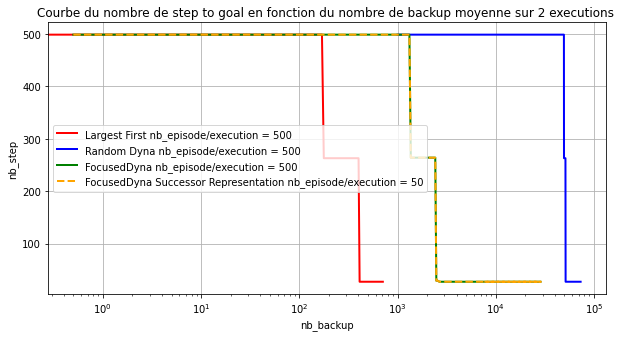

In [18]:
plt.figure(figsize=(10,5))
plt.plot(moyenne_par_indice(all_backups_lg), moyenne_par_indice(all_steps_lg), color='red', linewidth=2, label = f"Largest First nb_episode/execution = {QueueDyna.episode}")

plt.plot(moyenne_par_indice(all_backups_rd), moyenne_par_indice(all_steps_rd) ,color='blue', linewidth=2, label = f"Random Dyna nb_episode/execution = {RDyna.episode}")

plt.plot(moyenne_par_indice(all_backups_fc), moyenne_par_indice(all_steps_fc), color='green', linewidth=2, label = f"FocusedDyna nb_episode/execution = {FDyna.episode}")


plt.plot(moyenne_par_indice(all_backups_sr), moyenne_par_indice(all_steps_sr), color='orange', linewidth=2, label = f"FocusedDyna Successor Representation nb_episode/execution = {fdsr.episode}", linestyle="--")



plt.title(f'Courbe du nombre de step to goal en fonction du nombre de backup moyenne sur {nb_exec} executions ')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.legend(loc='best')
plt.grid(True)
#plt.savefig("img/fig-8.png")
plt.show()

In [6]:
dic = dict()
import frozenset
dic[0] = {frozenlist(1,2)}
dic[0].add(2)


dic[0]

print(1 in dic.keys())

for exp in dic[1]:
    print(exp)

NameError: name 'frozenlist' is not defined